# OPERATIONAL RISK LOSS ANALYSIS

# Executive Summary

# Objective

The objective of this project was to perform a comprehensive statistical analysis of operational risk loss data to identify patterns and trends that can inform risk management strategies. This analysis utilized data visualization to explore the frequency and distribution of operational losses across different time dimensions, such as months and days of the week and employ various advanced statistical techniques, including tests for multicollinearity, t-tests, one-way ANOVA, and tukey HSD post hoc tests to determine relationships and differences among loss types. By leveraging these statistical methods and visualizations, I aim to showcase and provide insights in the prediction and mitigation of operational risks.

**Data Source:**

The operational loss data used in this project was obtained from the OpVaR package available on the Comprehensive R Archive Network (CRAN). The specific version used was OpVaR 1.2.

## Findings

**Correlation Matrix**

A correlation matrix was generated to examine the relationships between the loss and period and for the different loss types. The analysis showed low correlations among the variables, indicating weak relationships between the various loss types.

**Multicollinearity Check (VIF)**

To assess the presence of multicollinearity, Variance Inflation Factors (VIFs) were calculated for each loss type. The results showed that the VIF values were well within the acceptable range, suggesting no significant multicollinearity among the variables.


**Hypothesis Testing**

Two-sample t-tests were performed to compare the means between pairs of loss types. The analysis revealed the following findings:

Significant differences were observed between Loss Type 1 & Loss Type 2, Loss Type 2 & Loss Type 3, Loss Type 2 & Loss Type 4, and Loss Type 3 & Loss Type 4.
No significant differences were found between Loss Type 1 & Loss Type 3 and Loss Type 1 & Loss Type 4.

**ANOVA Test**

A one-way Analysis of Variance (ANOVA) test was conducted to determine if there were any significant differences in the means across all loss types. The ANOVA results showed a statistically significant difference in the mean losses across the different loss type categories. 

**Post-hoc Test (Tukey's HSD)**

To further investigate the differences between the loss types, a post-hoc analysis using Tukey's Honest Significant Difference (HSD) test was performed. The post-hoc analysis provided pairwise comparisons of the loss types and confirmed the specific pairs that had significant differences in their means.


**Confidence Interval**

The confidence interval for each loss type differs, Loss type 2 showed highest avergae loss type while loss type 4 showed the lowest average loss type.  



**Interpretation of Results**

The statistical analysis revealed that certain loss types have significantly different mean values, suggesting distinct characteristics or underlying factors affecting these losses. The ANOVA and post-hoc tests highlighted the need for tailored strategies in managing different types of operational risks.

Based on the confidence interval, the following can be adviced:

- Targeted Risk Management Strategies:

Develop tailored risk management strategies for each loss type, focusing on the unique characteristics and drivers of losses for each category.
For Loss Type 2, which exhibits the highest average losses, implement enhanced monitoring, control mechanisms, and risk mitigation efforts to address the underlying factors contributing to these larger losses.
For Loss Type 4, which has the lowest average losses, explore opportunities to apply best practices and lessons learned from this loss type to the other categories.

- Resource Allocation and Prioritization:

Allocate resources and budgets for risk management activities based on the relative importance and impact of each loss type, prioritizing the areas with the highest potential for loss reduction.
Concentrate more resources and attention on the management of Loss Type 2, given its higher average losses, to maximize the potential for loss reduction and financial performance improvement.


**Conclusion**

The findings from this statistical analysis provide valuable insights into the differences among the various loss types. Showing that not all loss types are similar, highlighting the need for tailored strategies and the implementation of appropriate controls to mitigate the unique challenges in managing different types of operational risks.

**Recommendation**

Further investigation, monitoring, and root cause analyses for the loss types with significant differences are warranted to understand the underlying drivers and vulnerabilities of the loss data. Incorporating other relevant factors may also provide a deeper understanding of the underlying factors contributing to the observed differences. This comprehensive approach will be crucial for developing effective risk management strategies and improving overall operational performance.

# Import Necessary Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Accessing Data

In [2]:
import pyreadr

# Load the data from the .rda file
result = pyreadr.read_r("/Users/mabelogonna/Downloads/OpVaR/data/lossdat.rda")

In [3]:
# Define file paths
file_path1 = "/Users/mabelogonna/Downloads/OpVaR/data/lossdat_1.csv"
file_path2 = "/Users/mabelogonna/Downloads/OpVaR/data/lossdat_2.csv"
file_path3 = "/Users/mabelogonna/Downloads/OpVaR/data/lossdat_3.csv"
file_path4 = "/Users/mabelogonna/Downloads/OpVaR/data/lossdat_4.csv"

In [4]:
# Load data into pandas DataFrames

# Loss Type 1
lossdat_1 = pd.read_csv(file_path1)

# Loss Type 2
lossdat_2 = pd.read_csv(file_path2)

# Loss Type 3
lossdat_3 = pd.read_csv(file_path3)

# Loss Type 4
lossdat_4 = pd.read_csv(file_path4)

In [5]:
# Display lossdat_1
print("lossdat_1:")
lossdat_1.head()

lossdat_1:


,Loss,Period,Date
0,1877,1,2016-12-31
1,1807,1,2016-12-30
2,918,1,2016-12-30
3,1480,1,2016-12-29
4,1218,1,2016-12-27


In [6]:
# Display lossdat_2
print("lossdat_2:")
lossdat_2.head()

lossdat_2:


,Loss,Period,Date
0,181,1,2016-12-31
1,610,1,2016-12-23
2,961,1,2016-12-19
3,1312,1,2016-12-19
4,259,1,2016-12-14


In [7]:
# Display lossdat_3
print("lossdat_3:")
lossdat_3.head()

lossdat_3:


,Loss,Period,Date
0,1334,1,2016-12-31
1,1067,1,2016-12-30
2,1068,1,2016-12-29
3,714,1,2016-12-26
4,1590,1,2016-12-26


In [8]:
# Display lossdat_4
print("lossdat_4:")
lossdat_4.head()

lossdat_4:


,Loss,Period,Date
0,650,1,2016-12-31
1,847,1,2016-12-30
2,242,1,2016-12-11
3,513,1,2016-12-09
4,264,1,2016-12-07


# Checking for Missing Values and Duplicates

In [9]:
# Check dimension

print(lossdat_1.shape)
print(lossdat_2.shape)
print(lossdat_3.shape)
print(lossdat_4.shape)

(1965, 3)
(2025, 3)
(1995, 3)
(1941, 3)


In [10]:
# Data Summary
lossdat_1.info()

print("\nData Info for lossdat_2")
lossdat_2.info()

print("\nData Info for lossdat_3")
lossdat_3.info()

print("\nData Info for lossdat_4")
lossdat_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Loss    1965 non-null   int64 
 1   Period  1965 non-null   int64 
 2   Date    1965 non-null   object
dtypes: int64(2), object(1)
memory usage: 46.2+ KB

Data Info for lossdat_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Loss    2025 non-null   int64 
 1   Period  2025 non-null   int64 
 2   Date    2025 non-null   object
dtypes: int64(2), object(1)
memory usage: 47.6+ KB

Data Info for lossdat_3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Loss    1995 non-null   int64 
 1   Period  1995 non-null   int64 
 2   Date    1995 non-null

In [11]:
# Check for missing values
print("Missing values in lossdat_1:")
print(lossdat_1.isnull().sum())
print("\nMissing values in lossdat_2:")
print(lossdat_2.isnull().sum())
print("\nMissing values in lossdat_3:")
print(lossdat_3.isnull().sum())
print("\nMissing values in lossdat_4:")
print(lossdat_4.isnull().sum())

# Check for duplicates
print("\nDuplicates in lossdat_1:")
print(lossdat_1.duplicated().sum())
print("\nDuplicates in lossdat_2:")
print(lossdat_2.duplicated().sum())
print("\nDuplicates in lossdat_3:")
print(lossdat_3.duplicated().sum())
print("\nDuplicates in lossdat_4:")
print(lossdat_4.duplicated().sum())

Missing values in lossdat_1:
Loss      0
Period    0
Date      0
dtype: int64

Missing values in lossdat_2:
Loss      0
Period    0
Date      0
dtype: int64

Missing values in lossdat_3:
Loss      0
Period    0
Date      0
dtype: int64

Missing values in lossdat_4:
Loss      0
Period    0
Date      0
dtype: int64

Duplicates in lossdat_1:
0

Duplicates in lossdat_2:
0

Duplicates in lossdat_3:
0

Duplicates in lossdat_4:
0


# Data Visualization

### Distribution Plot

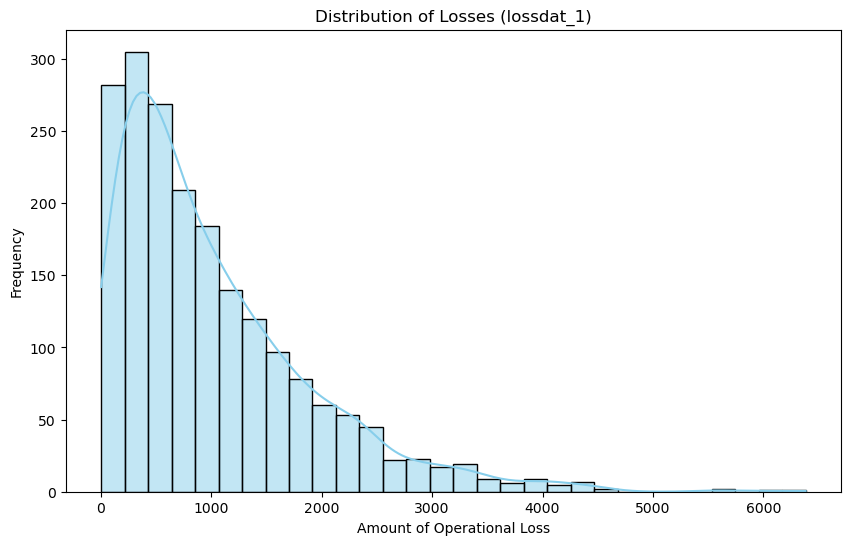

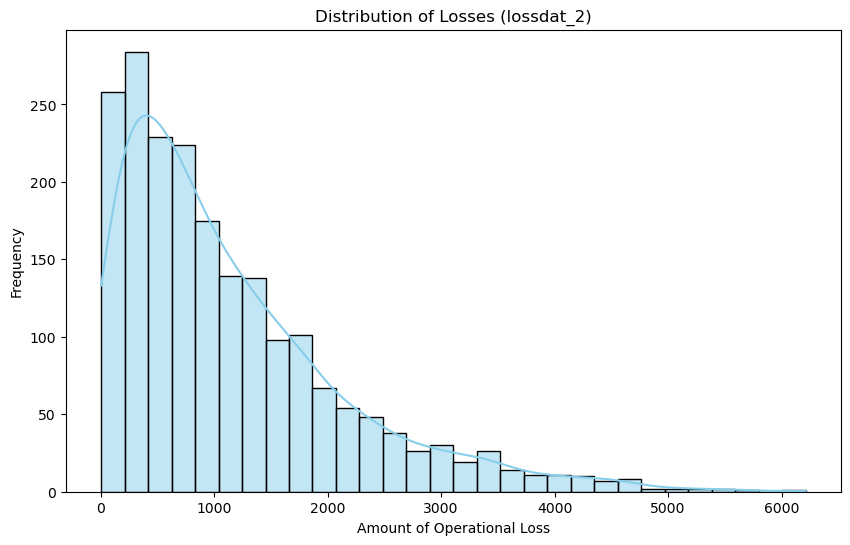

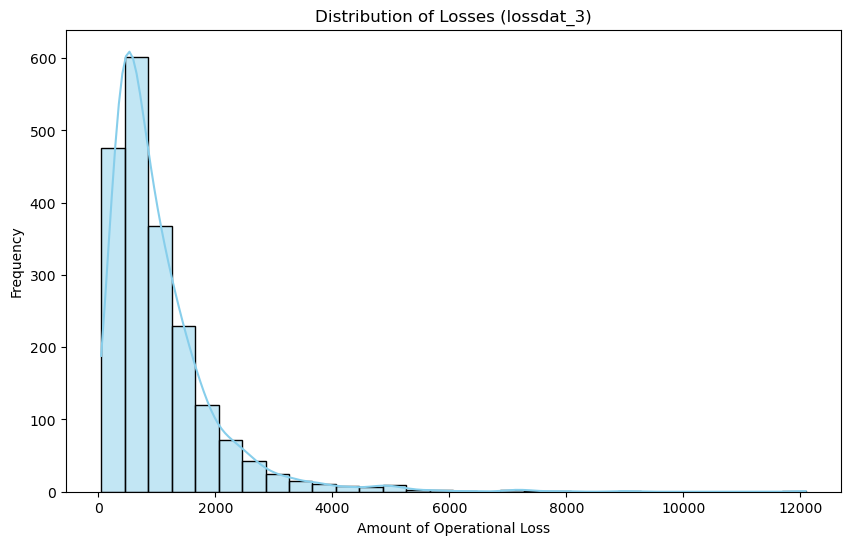

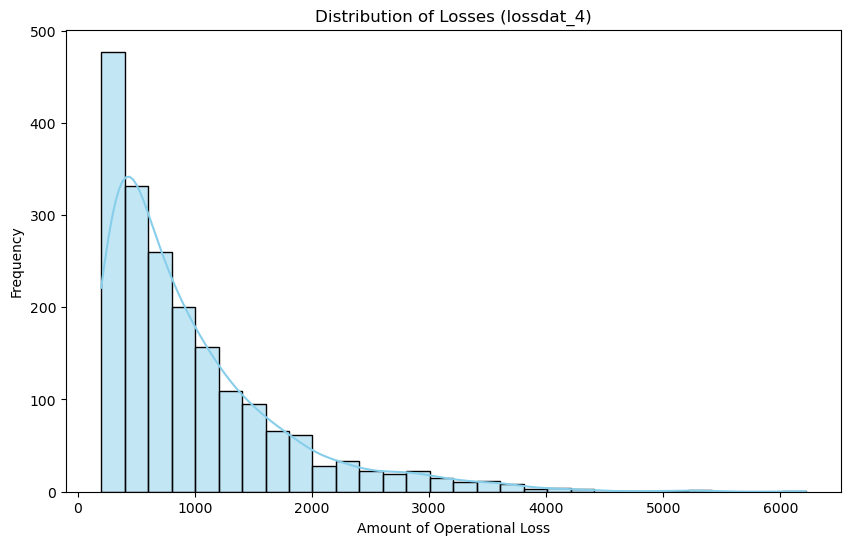

In [12]:
# Utilizing matplotlib and seaborn

# Function to plot histogram with KDE
def plot_hist_with_kde(df, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Loss'], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Amount of Operational Loss')
    plt.ylabel('Frequency')
    plt.show()

# Plot for each DataFrame
plot_hist_with_kde(lossdat_1, 'Distribution of Losses (lossdat_1)')
plot_hist_with_kde(lossdat_2, 'Distribution of Losses (lossdat_2)')
plot_hist_with_kde(lossdat_3, 'Distribution of Losses (lossdat_3)')
plot_hist_with_kde(lossdat_4, 'Distribution of Losses (lossdat_4)')

### Box Plots

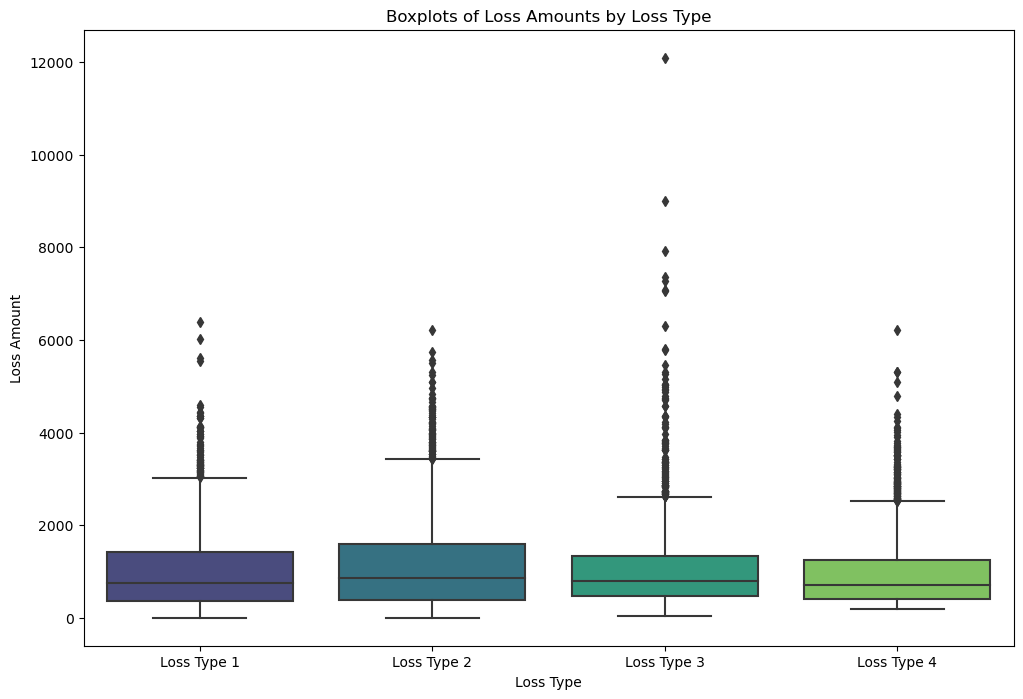

In [13]:
# Add a column to each DataFrame to indicate the loss type
lossdat_1['Loss Type'] = 'Loss Type 1'
lossdat_2['Loss Type'] = 'Loss Type 2'
lossdat_3['Loss Type'] = 'Loss Type 3'
lossdat_4['Loss Type'] = 'Loss Type 4'

# Combine all DataFrames into one
combined_lossdat = pd.concat([lossdat_1, lossdat_2, lossdat_3, lossdat_4])

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Loss Type', y='Loss', data=combined_lossdat, palette='viridis')
plt.xlabel('Loss Type')
plt.ylabel('Loss Amount')
plt.title('Boxplots of Loss Amounts by Loss Type')
plt.show()

### QQ Plots

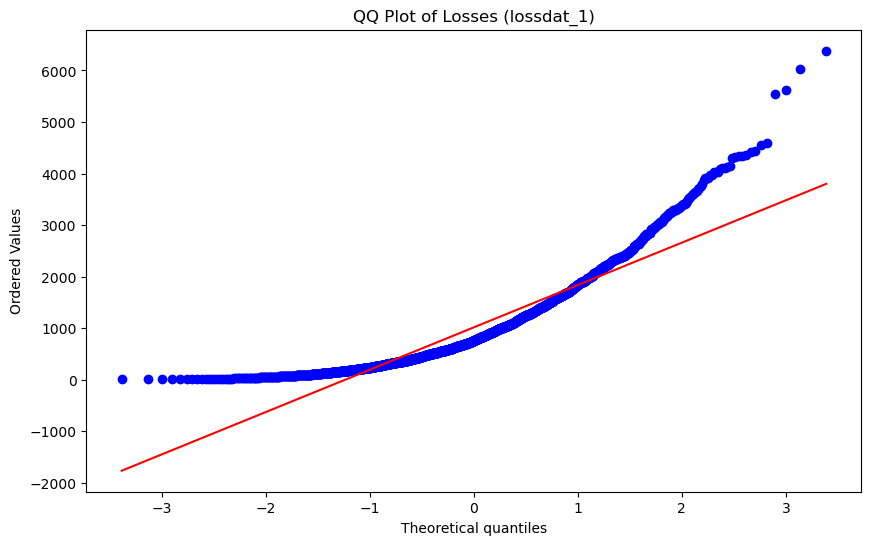

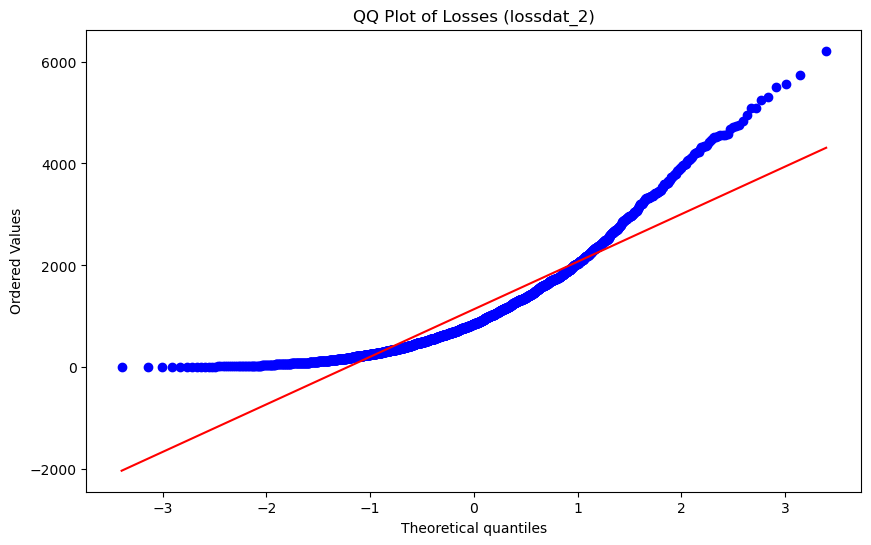

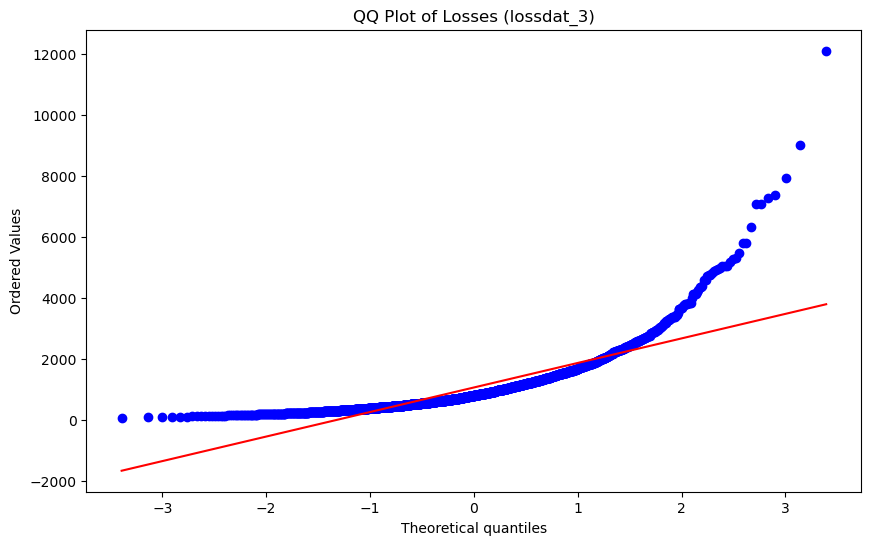

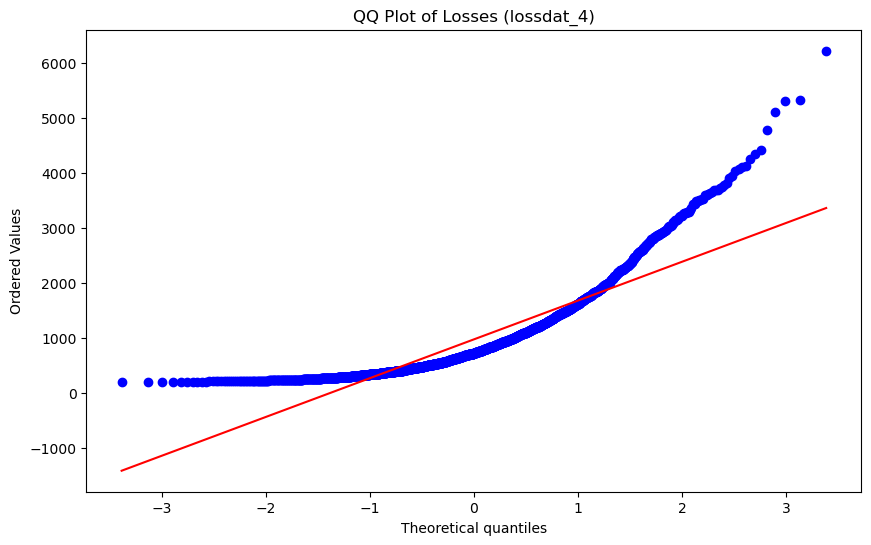

In [14]:
# Using scipy.stats 

# Function to plot QQ plot
def plot_qq(df, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(df['Loss'], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Plot for each DataFrame
plot_qq(lossdat_1, 'QQ Plot of Losses (lossdat_1)')
plot_qq(lossdat_2, 'QQ Plot of Losses (lossdat_2)')
plot_qq(lossdat_3, 'QQ Plot of Losses (lossdat_3)')
plot_qq(lossdat_4, 'QQ Plot of Losses (lossdat_4)')

### Observation

The data for all the loss types(1, 2, 3 and 4) are right-skewed with presence of outliers observed by the box plots. The QQ plot also shows that the data points do not follow a straight line, which indicates deviation from the theoritical quantile - normal distribution.

### Identifying Outliers

In [15]:
# Function to identify outliers using IQR
def identify_outliers(df):
    Q1 = df['Loss'].quantile(0.25)
    Q3 = df['Loss'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Loss'] < (Q1 - 1.5 * IQR)) | (df['Loss'] > (Q3 + 1.5 * IQR))]
    return outliers

# Identify outliers for each DataFrame
outliers_lossdat_1 = identify_outliers(lossdat_1)
outliers_lossdat_2 = identify_outliers(lossdat_2)
outliers_lossdat_3 = identify_outliers(lossdat_3)
outliers_lossdat_4 = identify_outliers(lossdat_4)

# Print outliers
print("Outliers in lossdat_1:")
print(outliers_lossdat_1)
print("\nOutliers in lossdat_2:")
print(outliers_lossdat_2)
print("\nOutliers in lossdat_3:")
print(outliers_lossdat_3)
print("\nOutliers in lossdat_4:")
print(outliers_lossdat_4)

Outliers in lossdat_1:
      Loss  Period        Date    Loss Type
67    4353       2  2016-08-18  Loss Type 1
86    3391       2  2016-07-09  Loss Type 1
95    4113       3  2016-06-15  Loss Type 1
155   3905       4  2016-02-20  Loss Type 1
189   4117       4  2016-01-03  Loss Type 1
...    ...     ...         ...          ...
1920  4037      40  2007-03-18  Loss Type 1
1922  3180      40  2007-03-13  Loss Type 1
1939  3750      40  2007-02-13  Loss Type 1
1956  3234      40  2007-01-25  Loss Type 1
1961  3313      40  2007-01-10  Loss Type 1

[73 rows x 4 columns]

Outliers in lossdat_2:
      Loss  Period        Date    Loss Type
200   3455       4  2016-01-17  Loss Type 2
316   3616       7  2015-06-19  Loss Type 2
319   3679       7  2015-06-18  Loss Type 2
328   4063       7  2015-06-08  Loss Type 2
329   3446       7  2015-06-07  Loss Type 2
...    ...     ...         ...          ...
1776  3488      36  2008-03-29  Loss Type 2
1788  5742      36  2008-03-08  Loss Type 2
1812  

### Descriptive Statistics

In [16]:
# Function to display summary statistics
def display_summary(df, title):
    print(f"\nSummary Statistics for {title}:")
    print(df.describe().transpose())

# Summary for each DataFrame
display_summary(lossdat_1, 'lossdat_1')
display_summary(lossdat_2, 'lossdat_2')
display_summary(lossdat_3, 'lossdat_3')
display_summary(lossdat_4, 'lossdat_4')


Summary Statistics for lossdat_1:
         count         mean         std  min    25%    50%     75%     max
Loss    1965.0  1016.951145  881.787605  5.0  359.0  760.0  1428.0  6382.0
Period  1965.0    20.513995   11.514377  1.0   10.0   21.0    30.0    40.0

Summary Statistics for lossdat_2:
         count         mean          std  min    25%    50%     75%     max
Loss    2025.0  1139.487901  1000.868135  3.0  388.0  850.0  1603.0  6213.0
Period  2025.0    20.395062    11.628088  1.0   10.0   20.0    31.0    40.0

Summary Statistics for lossdat_3:
         count         mean         std   min    25%    50%     75%      max
Loss    1995.0  1051.507268  940.738532  48.0  464.0  788.0  1325.0  12092.0
Period  1995.0    20.231579   11.871702   1.0   10.0   20.0    31.0     40.0

Summary Statistics for lossdat_4:
         count        mean         std    min    25%    50%     75%     max
Loss    1941.0  969.105100  781.152228  201.0  411.0  717.0  1255.0  6215.0
Period  1941.0   20.5198

**For lossdat_1:**

- The mean (average) loss is 1016.95
- The minimum amount of loss is 5
- The maximum amount of loss is 6382
- The median loss is 760


**For lossdat_2:**

- The mean (average) loss is 1139.48
- The minimum amount of loss is 3
- The maximum amount of loss is 6213
- The median loss is 850

**For lossdat_3:**

- The mean (average) loss is 1051.50
- The minimum amount of loss is 48
- The maximum amount of loss is 12092
- The median loss is 788

**For lossdat_4:**

- The mean (average) loss is 969.10
- The minimum amount of loss is 201
- The maximum amount of loss is 6215
- The median loss is 717

# Analysis of Operational Risk Loss Types

## Days with Highest Number of Operational Risk Losses

In [17]:
# Function to calculate the day with the highest number of losses
def calculate_highest_loss_day(df, title):
    highest_loss_day = df.groupby(['Date']).size().sort_values(ascending=False).index[0]
    highest_loss_count = df.groupby(['Date']).size().sort_values(ascending=False).iloc[0]
    print(f"The day with the highest number of Operational Risk Losses for {title} is {highest_loss_day} with {highest_loss_count} losses.")

# Calculate for each DataFrame
calculate_highest_loss_day(lossdat_1, "lossdat_1")
calculate_highest_loss_day(lossdat_2, "lossdat_2")
calculate_highest_loss_day(lossdat_3, "lossdat_3")
calculate_highest_loss_day(lossdat_4, "lossdat_4")

The day with the highest number of Operational Risk Losses for lossdat_1 is 2009-10-31 with 5 losses.
The day with the highest number of Operational Risk Losses for lossdat_2 is 2014-01-09 with 5 losses.
The day with the highest number of Operational Risk Losses for lossdat_3 is 2008-11-19 with 5 losses.
The day with the highest number of Operational Risk Losses for lossdat_4 is 2012-02-28 with 4 losses.


## Number of Losses by Day of Week

Top 3 days for lossdat_1:
        Date  Number_of_losses
0 2009-10-31                 5
1 2007-07-23                 4
2 2013-08-26                 4

Top 3 days for lossdat_2:
        Date  Number_of_losses
0 2014-01-09                 5
1 2012-12-11                 5
2 2010-03-30                 4

Top 3 days for lossdat_3:
        Date  Number_of_losses
0 2008-11-19                 5
1 2007-06-22                 4
2 2010-03-07                 4

Top 3 days for lossdat_4:
        Date  Number_of_losses
0 2012-02-28                 4
1 2009-07-04                 4
2 2007-11-16                 4

Losses by day of the week for lossdat_1:
Day_of_week_name
Monday       267
Tuesday      293
Wednesday    283
Thursday     283
Friday       279
Saturday     287
Sunday       273
dtype: int64

Losses by day of the week for lossdat_2:
Day_of_week_name
Monday       285
Tuesday      310
Wednesday    282
Thursday     293
Friday       290
Saturday     269
Sunday       296
dtype: int64

Losses by day 

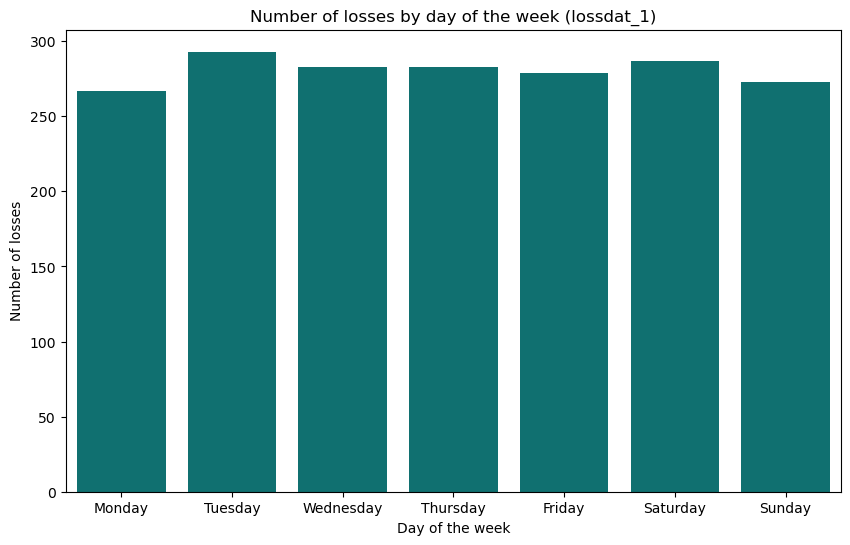

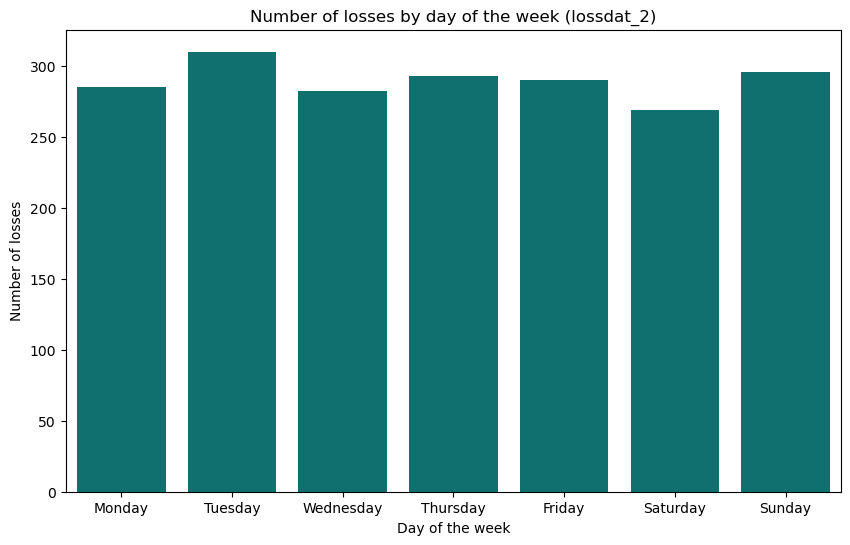

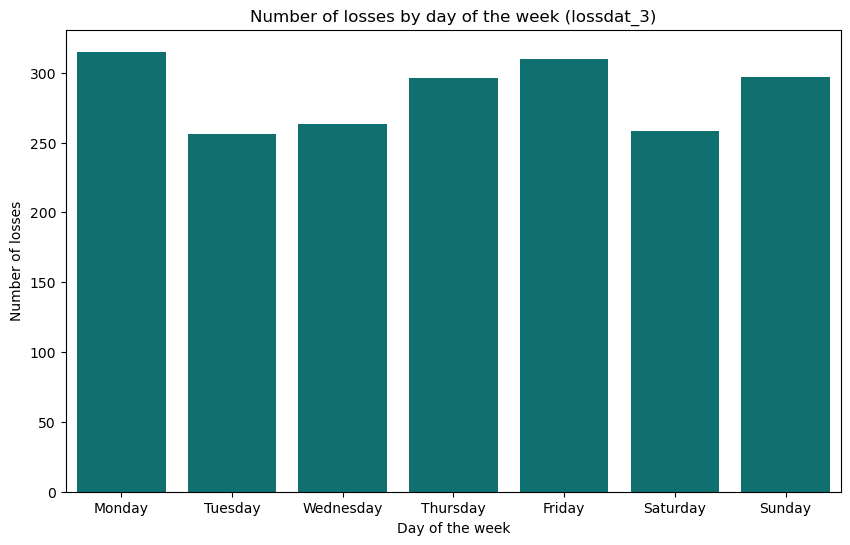

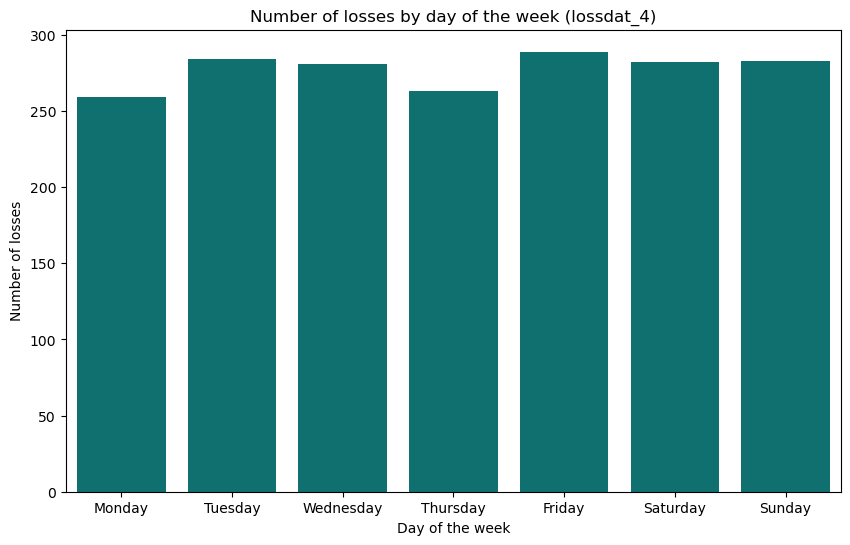

In [18]:

# Dates in datetime format
def convert_dates(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

lossdat_1 = convert_dates(lossdat_1)
lossdat_2 = convert_dates(lossdat_2)
lossdat_3 = convert_dates(lossdat_3)
lossdat_4 = convert_dates(lossdat_4)

# Function to add day of the week columns
def add_day_of_week(df):
    df['Day_of_week'] = df['Date'].dt.dayofweek
    df['Day_of_week_name'] = df['Date'].dt.day_name()
    df['Day_of_week_name'] = pd.Categorical(df['Day_of_week_name'], 
                                            categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
                                            ordered=True)
    return df

# Add day of the week columns to each DataFrame
lossdat_1 = add_day_of_week(lossdat_1)
lossdat_2 = add_day_of_week(lossdat_2)
lossdat_3 = add_day_of_week(lossdat_3)
lossdat_4 = add_day_of_week(lossdat_4)

# Function to calculate the top n days with the highest number of losses
def display_top_days(df, title, top_n=3):
    top_days = df.groupby('Date').size().sort_values(ascending=False).head(top_n)
    top_days_df = top_days.reset_index(name='Number_of_losses')
    print(f"Top {top_n} days for {title}:\n{top_days_df}\n")
    return top_days_df

# Function to calculate the day of the week with the highest number of losses
def losses_by_day_of_week(df, title):
    day_of_week_counts = df.groupby('Day_of_week_name').size()
    print(f"Losses by day of the week for {title}:\n{day_of_week_counts}\n")
    return day_of_week_counts

# Display and get the results for each DataFrame
top_days_1 = display_top_days(lossdat_1, "lossdat_1", top_n=3)
top_days_2 = display_top_days(lossdat_2, "lossdat_2", top_n=3)
top_days_3 = display_top_days(lossdat_3, "lossdat_3", top_n=3)
top_days_4 = display_top_days(lossdat_4, "lossdat_4", top_n=3)

losses_by_day_of_week_1 = losses_by_day_of_week(lossdat_1, "lossdat_1")
losses_by_day_of_week_2 = losses_by_day_of_week(lossdat_2, "lossdat_2")
losses_by_day_of_week_3 = losses_by_day_of_week(lossdat_3, "lossdat_3")
losses_by_day_of_week_4 = losses_by_day_of_week(lossdat_4, "lossdat_4")

# Plot the number of losses by day of the week for each DataFrame
def plot_losses_by_day_of_week(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Day_of_week_name', data=df, color='teal', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.xlabel("Day of the week")
    plt.ylabel("Number of losses")
    plt.title(title)
    plt.show()

plot_losses_by_day_of_week(lossdat_1, 'Number of losses by day of the week (lossdat_1)')
plot_losses_by_day_of_week(lossdat_2, 'Number of losses by day of the week (lossdat_2)')
plot_losses_by_day_of_week(lossdat_3, 'Number of losses by day of the week (lossdat_3)')
plot_losses_by_day_of_week(lossdat_4, 'Number of losses by day of the week (lossdat_4)')

In [19]:
# Function to display top n days with the highest number of losses
def display_top_days(df, title, top_n=3):
    top_days = df.groupby('Date').size().sort_values(ascending=False).head(top_n)
    print(f"Top {top_n} days for {title}:\n{top_days}\n")

# Display top 3 days for each DataFrame
display_top_days(lossdat_1, "lossdat_1", top_n=3)
display_top_days(lossdat_2, "lossdat_2", top_n=3)
display_top_days(lossdat_3, "lossdat_3", top_n=3)
display_top_days(lossdat_4, "lossdat_4", top_n=3)

Top 3 days for lossdat_1:
Date
2009-10-31    5
2007-07-23    4
2013-08-26    4
dtype: int64

Top 3 days for lossdat_2:
Date
2014-01-09    5
2012-12-11    5
2010-03-30    4
dtype: int64

Top 3 days for lossdat_3:
Date
2008-11-19    5
2007-06-22    4
2010-03-07    4
dtype: int64

Top 3 days for lossdat_4:
Date
2012-02-28    4
2009-07-04    4
2007-11-16    4
dtype: int64



## Number of Losses by Month

In [20]:
# Function to add month_txt column
def add_month_txt(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['month_txt'] = df['Date'].dt.strftime('%b')
    df['month_txt'] = pd.Categorical(df['month_txt'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
    return df

# Add month_txt column to each DataFrame
lossdat_1 = add_month_txt(lossdat_1)
lossdat_2 = add_month_txt(lossdat_2)
lossdat_3 = add_month_txt(lossdat_3)
lossdat_4 = add_month_txt(lossdat_4)

In [21]:
# Check
lossdat_1.head()

,Loss,Period,Date,Loss Type,Day_of_week,Day_of_week_name,month_txt
0,1877,1,2016-12-31,Loss Type 1,5,Saturday,Dec
1,1807,1,2016-12-30,Loss Type 1,4,Friday,Dec
2,918,1,2016-12-30,Loss Type 1,4,Friday,Dec
3,1480,1,2016-12-29,Loss Type 1,3,Thursday,Dec
4,1218,1,2016-12-27,Loss Type 1,1,Tuesday,Dec


In [22]:
# Function to calculate the month with the highest number of losses
def calculate_highest_loss_month(df, title):
    month_loss_counts = df.groupby('month_txt').size().sort_values(ascending=False)
    highest_loss_month = month_loss_counts.index[0]
    highest_loss_count = month_loss_counts.iloc[0]
    print(f"The month with the highest number of Operational Risk Losses for {title} is {highest_loss_month} with {highest_loss_count} losses.")

# Calculate for each DataFrame
calculate_highest_loss_month(lossdat_1, "lossdat_1")
calculate_highest_loss_month(lossdat_2, "lossdat_2")
calculate_highest_loss_month(lossdat_3, "lossdat_3")
calculate_highest_loss_month(lossdat_4, "lossdat_4")

# Optionally, to display the top months
def display_top_months(df, title, top_n=7):
    top_months = df.groupby('month_txt').size().sort_values(ascending=False).head(top_n)
    print(f"\nTop {top_n} months for {title}:\n{top_months}\n")

# Display top 7 months for each DataFrame
display_top_months(lossdat_1, "lossdat_1", top_n=3)
display_top_months(lossdat_2, "lossdat_2", top_n=3)
display_top_months(lossdat_3, "lossdat_3", top_n=3)
display_top_months(lossdat_4, "lossdat_4", top_n=3)


The month with the highest number of Operational Risk Losses for lossdat_1 is Nov with 179 losses.
The month with the highest number of Operational Risk Losses for lossdat_2 is May with 187 losses.
The month with the highest number of Operational Risk Losses for lossdat_3 is Nov with 195 losses.
The month with the highest number of Operational Risk Losses for lossdat_4 is Feb with 193 losses.

Top 3 months for lossdat_1:
month_txt
Nov    179
Dec    179
Oct    173
dtype: int64


Top 3 months for lossdat_2:
month_txt
May    187
Feb    181
Jan    176
dtype: int64


Top 3 months for lossdat_3:
month_txt
Nov    195
Jan    192
Aug    174
dtype: int64


Top 3 months for lossdat_4:
month_txt
Feb    193
Jan    184
Nov    172
dtype: int64



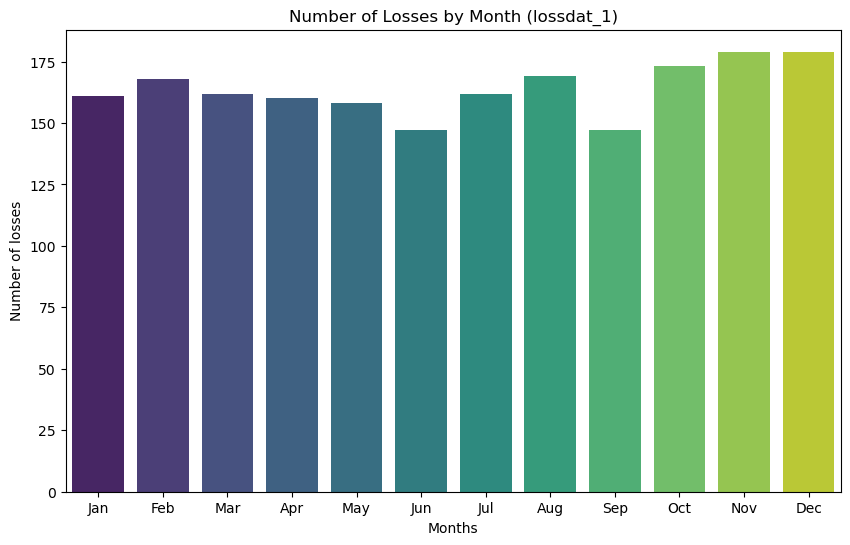

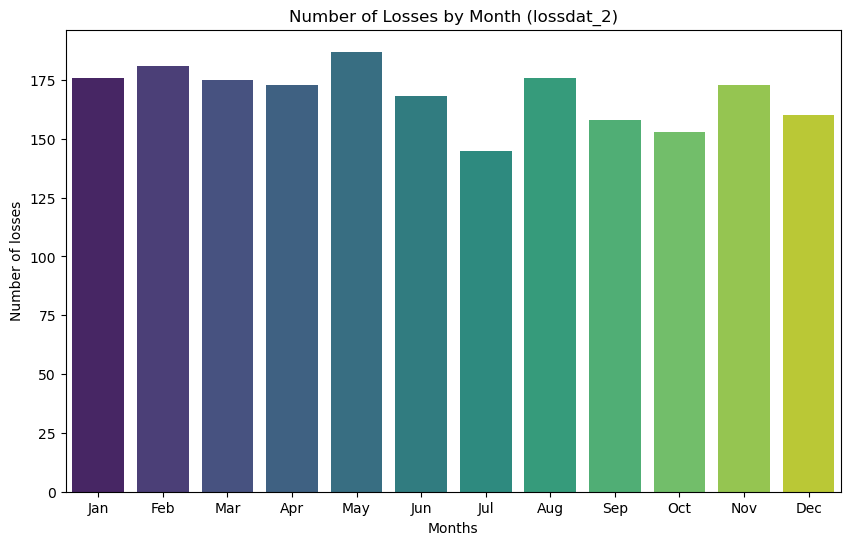

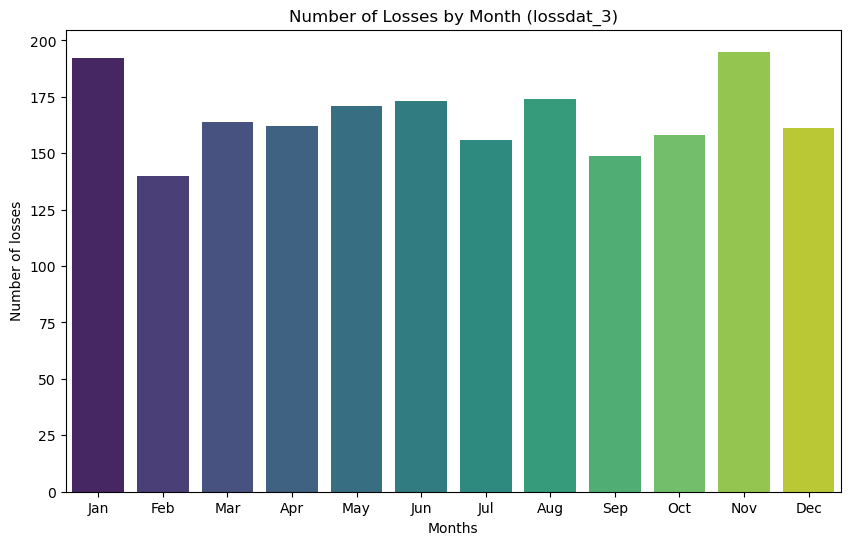

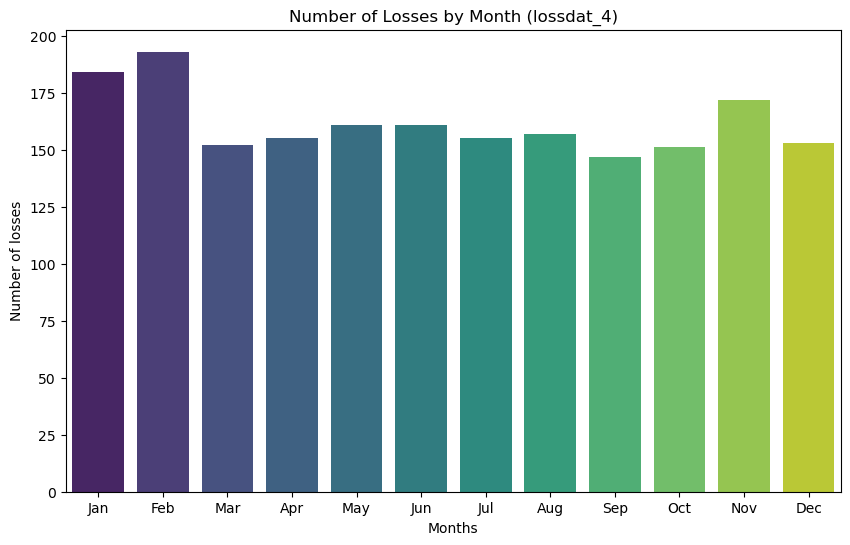

In [22]:
# Function to plot number of losses by month
def plot_losses_by_month(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month_txt', data=df, palette='viridis', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xlabel("Months")
    plt.ylabel("Number of losses")
    plt.title(title)
    plt.show()

# Plot for each DataFrame
plot_losses_by_month(lossdat_1, 'Number of Losses by Month (lossdat_1)')
plot_losses_by_month(lossdat_2, 'Number of Losses by Month (lossdat_2)')
plot_losses_by_month(lossdat_3, 'Number of Losses by Month (lossdat_3)')
plot_losses_by_month(lossdat_4, 'Number of Losses by Month (lossdat_4)')

## Observation

**Operational Loss Type 1:**

The day with the highest number of losses is October 31, 2010, with 5 losses recorded. 

The day of the week with the highest number of losses is Tuesday, with 293 losses. The distribution of losses across the days of the week is uniform, suggesting that Operational risk loss type 1 have an equal probability of occurring on any day of the week. The months with the highest number of losses are November and December, each with 179 losses. Similarly, the distribution of losses across the months shows a uniform distribution, indicating that Operational Risks Type 1 have an equal probability of occurring in any month.

**Operational Loss Type 2:**

The day with the highest number of losses is January 10, 2014 , with 5 losses recorded. 

The day of the week with the highest number of losses is Tuesday, with 310 losses. The distribution of losses across the days of the week is uniform, suggesting that Operational risk loss type 2 have an equal probability of occurring on any day of the week. The month with the highest number of losses is May, with 187 losses. Similarly, the distribution of losses across the months shows a uniform distribution, indicating that Operational Risks Type 2 have an equal probability of occurring in any month.

**Operational Loss Type 3:**

The day with the highest number of losses is November 19, 2008(2008-11-19), with 5 losses recorded. 

The day of the week with the highest number of losses is Monday, with 315 losses. The distribution of losses across the days of the week is uniform, suggesting that Operational risk loss type 3 have an equal probability of occurring on any day of the week. The month with the highest number of losses is November, with 195 losses. Similarly, the distribution of losses across the months shows a uniform distribution, indicating that Operational Risks Type 3 have an equal probability of occurring in any month.

**Operational Loss Type 4:**

The day with the highest number of losses is February 28, 2012(2012-02-28), with 4 losses recorded. 

The day of the week with the highest number of losses is Friday with 289 losses. The distribution of losses across the days of the week is uniform, suggesting that Operational risk loss type 4 have an equal probability of occurring on any day of the week. The month with the highest number of losses is February, with 193 losses. Similarly, the distribution of losses across the months shows a uniform distribution, indicating that Operational Risks Type 4 have an equal probability of occurring in any month.


Top 3 days for lossdat_1:
        Date  Number_of_losses
0 2009-10-31                 5
1 2007-07-23                 4
2 2013-08-26                 4

Top 3 days for lossdat_2:
        Date  Number_of_losses
0 2014-01-09                 5
1 2012-12-11                 5
2 2010-03-30                 4

Top 3 days for lossdat_3:
        Date  Number_of_losses
0 2008-11-19                 5
1 2007-06-22                 4
2 2010-03-07                 4

Top 3 days for lossdat_4:
        Date  Number_of_losses
0 2012-02-28                 4
1 2009-07-04                 4
2 2007-11-16                 4

Losses by day of the week for lossdat_1:
Day_of_week_name
Monday       267
Tuesday      293
Wednesday    283
Thursday     283
Friday       279
Saturday     287
Sunday       273
dtype: int64

Losses by day of the week for lossdat_2:
Day_of_week_name
Monday       285
Tuesday      310
Wednesday    282
Thursday     293
Friday       290
Saturday     269
Sunday       296
dtype: int64

Losses by day 

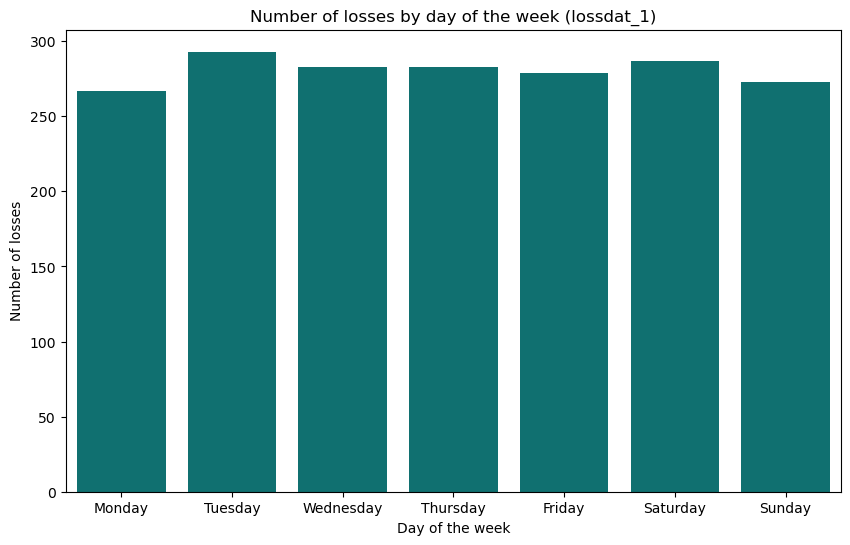

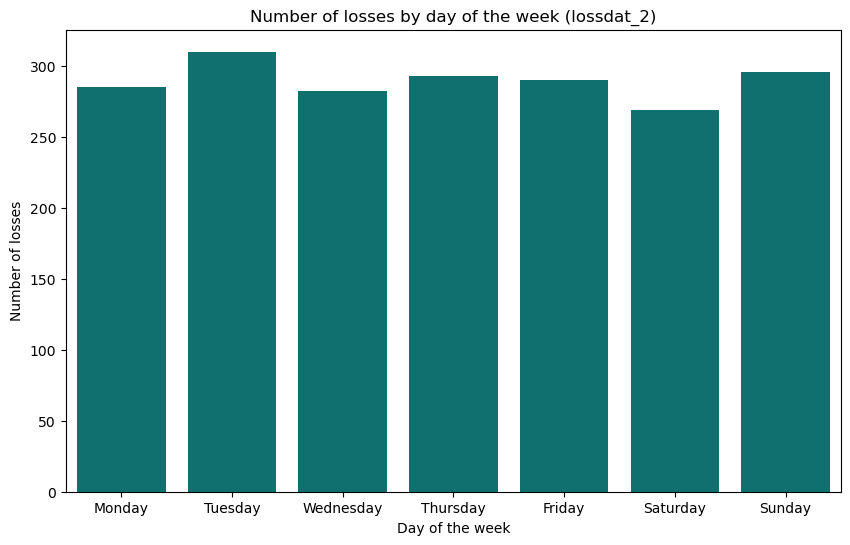

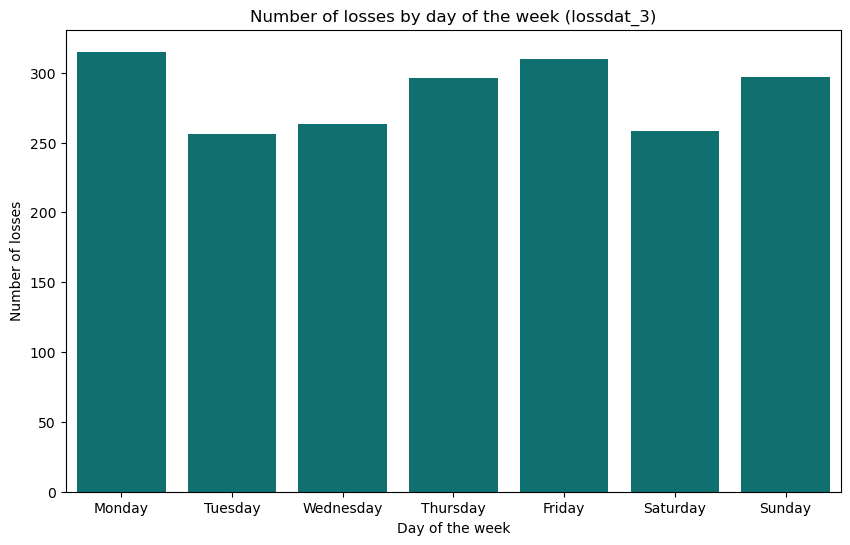

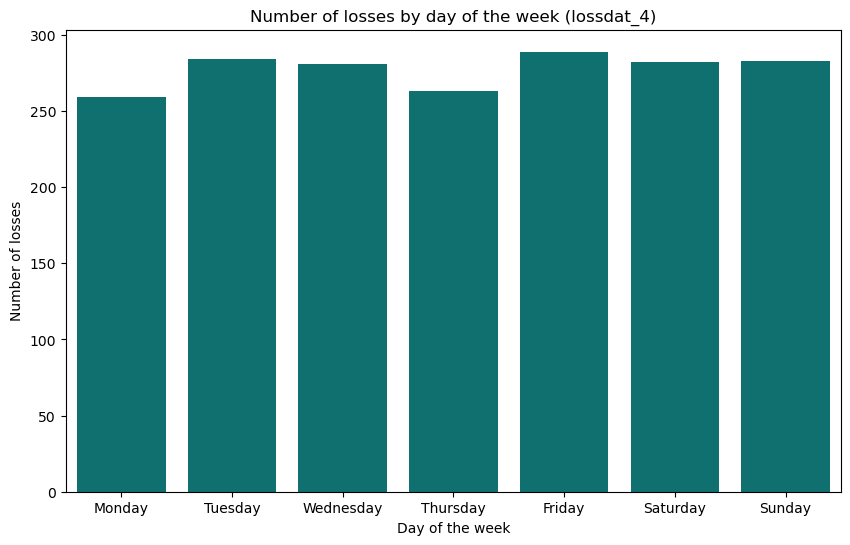

In [23]:
# Dates in datetime format
def convert_dates(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

lossdat_1 = convert_dates(lossdat_1)
lossdat_2 = convert_dates(lossdat_2)
lossdat_3 = convert_dates(lossdat_3)
lossdat_4 = convert_dates(lossdat_4)

# Function to add day of the week columns
def add_day_of_week(df):
    df['Day_of_week'] = df['Date'].dt.dayofweek
    df['Day_of_week_name'] = df['Date'].dt.day_name()
    df['Day_of_week_name'] = pd.Categorical(df['Day_of_week_name'], 
                                            categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
                                            ordered=True)
    return df

# Add day of the week columns to each DataFrame
lossdat_1 = add_day_of_week(lossdat_1)
lossdat_2 = add_day_of_week(lossdat_2)
lossdat_3 = add_day_of_week(lossdat_3)
lossdat_4 = add_day_of_week(lossdat_4)

# Function to calculate the top n days with the highest number of losses
def display_top_days(df, title, top_n=3):
    top_days = df.groupby('Date').size().sort_values(ascending=False).head(top_n)
    top_days_df = top_days.reset_index(name='Number_of_losses')
    print(f"Top {top_n} days for {title}:\n{top_days_df}\n")
    return top_days_df

# Function to calculate the day of the week with the highest number of losses
def losses_by_day_of_week(df, title):
    day_of_week_counts = df.groupby('Day_of_week_name').size()
    print(f"Losses by day of the week for {title}:\n{day_of_week_counts}\n")
    return day_of_week_counts

# Display and get the results for each DataFrame
top_days_1 = display_top_days(lossdat_1, "lossdat_1", top_n=3)
top_days_2 = display_top_days(lossdat_2, "lossdat_2", top_n=3)
top_days_3 = display_top_days(lossdat_3, "lossdat_3", top_n=3)
top_days_4 = display_top_days(lossdat_4, "lossdat_4", top_n=3)

losses_by_day_of_week_1 = losses_by_day_of_week(lossdat_1, "lossdat_1")
losses_by_day_of_week_2 = losses_by_day_of_week(lossdat_2, "lossdat_2")
losses_by_day_of_week_3 = losses_by_day_of_week(lossdat_3, "lossdat_3")
losses_by_day_of_week_4 = losses_by_day_of_week(lossdat_4, "lossdat_4")

# Plot the number of losses by day of the week for each DataFrame
def plot_losses_by_day_of_week(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Day_of_week_name', data=df, color='teal', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.xlabel("Day of the week")
    plt.ylabel("Number of losses")
    plt.title(title)
    plt.show()

plot_losses_by_day_of_week(lossdat_1, 'Number of losses by day of the week (lossdat_1)')
plot_losses_by_day_of_week(lossdat_2, 'Number of losses by day of the week (lossdat_2)')
plot_losses_by_day_of_week(lossdat_3, 'Number of losses by day of the week (lossdat_3)')
plot_losses_by_day_of_week(lossdat_4, 'Number of losses by day of the week (lossdat_4)')


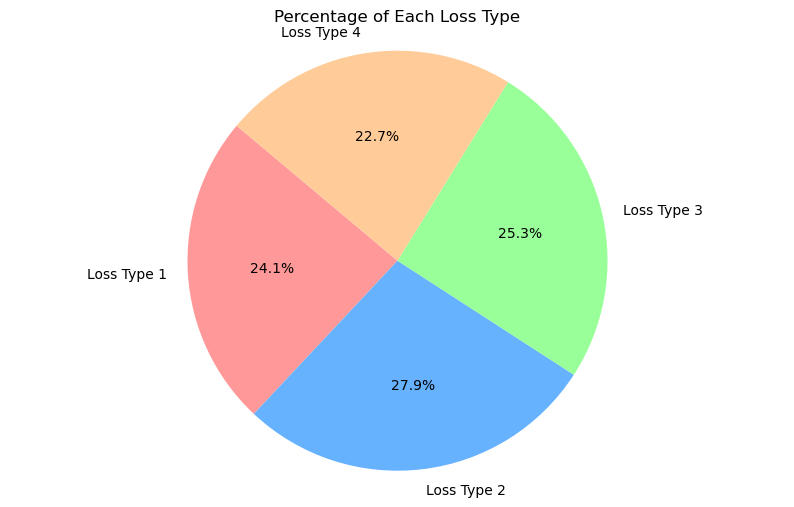

In [24]:
# Calculate the total number of losses for each loss type
total_losses_1 = lossdat_1['Loss'].sum()
total_losses_2 = lossdat_2['Loss'].sum()
total_losses_3 = lossdat_3['Loss'].sum()
total_losses_4 = lossdat_4['Loss'].sum()

# Combining the total losses into dictionary
total_losses = {
    'Loss Type 1': total_losses_1,
    'Loss Type 2': total_losses_2,
    'Loss Type 3': total_losses_3,
    'Loss Type 4': total_losses_4
}

# Data for the pie chart
labels = list(total_losses.keys())
sizes = list(total_losses.values())

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Percentage of Each Loss Type')
plt.axis('equal')
plt.show()

# Statistical Analysis

In [26]:
# Combine all DataFrames into one for correlation analysis
lossdat_1['Loss Type'] = 'Loss Type 1'
lossdat_2['Loss Type'] = 'Loss Type 2'
lossdat_3['Loss Type'] = 'Loss Type 3'
lossdat_4['Loss Type'] = 'Loss Type 4'

combined_lossdat = pd.concat([lossdat_1, lossdat_2, lossdat_3, lossdat_4])

# Select only numeric columns for correlation
numeric_cols = combined_lossdat[['Loss', 'Period']]

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()
corr_matrix


,Loss,Period
Loss,1.000000,-0.028736
Period,-0.028736,1.000000


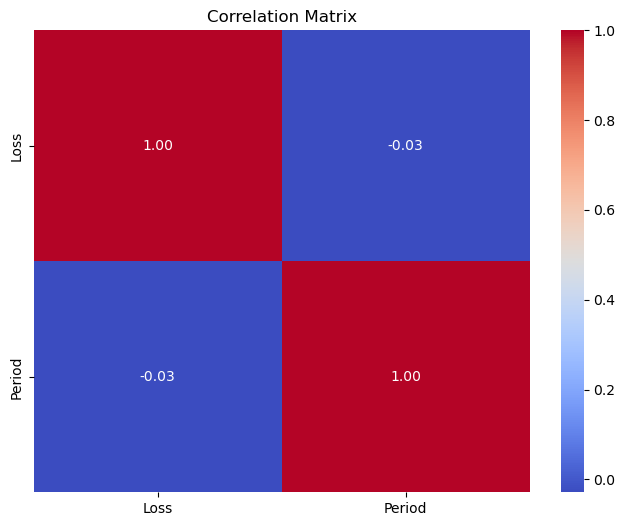

In [27]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Add a loss type column to each dataframe
lossdat_1['Loss_Type'] = 'Loss_Type_1'
lossdat_2['Loss_Type'] = 'Loss_Type_2'
lossdat_3['Loss_Type'] = 'Loss_Type_3'
lossdat_4['Loss_Type'] = 'Loss_Type_4'

# Combine all dataframes into one for correlation analysis
combined_lossdat = pd.concat([lossdat_1, lossdat_2, lossdat_3, lossdat_4])

# Pivot the combined dataframe to have each loss type as a separate column
pivot_table = combined_lossdat.pivot_table(index='Date', columns='Loss_Type', values='Loss', aggfunc='sum')

# Compute the correlation matrix
corr_matrix = pivot_table.corr()
corr_matrix

Loss_Type,Loss_Type_1,Loss_Type_2,Loss_Type_3,Loss_Type_4
Loss_Type,,,,
Loss_Type_1,1.000000,0.015387,-0.029876,-0.019078
Loss_Type_2,0.015387,1.000000,-0.071373,0.102137
Loss_Type_3,-0.029876,-0.071373,1.000000,-0.053703
Loss_Type_4,-0.019078,0.102137,-0.053703,1.000000


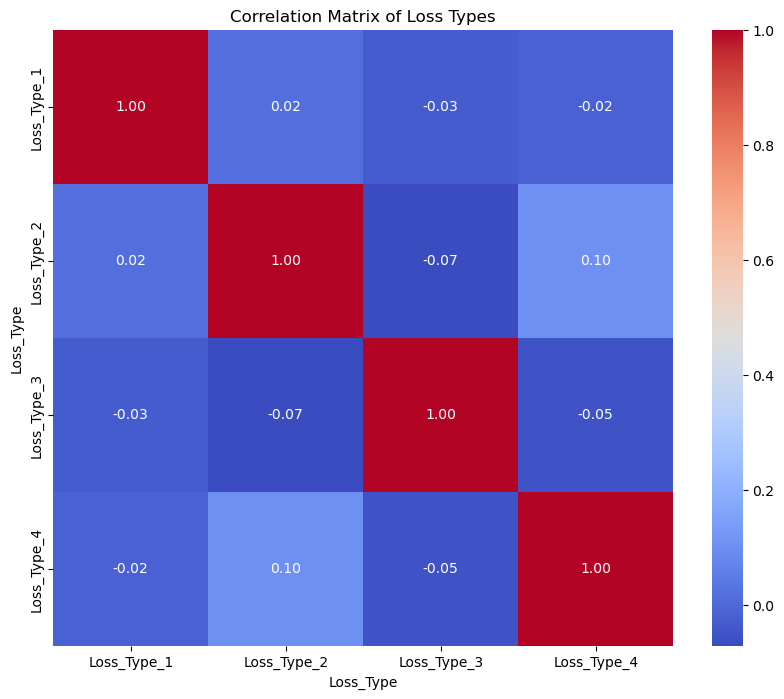

In [29]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Loss Types')
plt.show()

- **Loss_Type_1 and Loss_Type_2 (0.015387)**: There is a very weak positive correlation (close to zero) between Loss_Type_1 and Loss_Type_2. Suggesting that changes in Loss_Type_1 have almost no linear relationship with changes in Loss_Type_2.


- **Loss_Type_1 and Loss_Type_3 (-0.029876)**: There is a very weak negative correlation between Loss_Type_1 and Loss_Type_3. This suggests that changes in Loss_Type_1 have almost no linear relationship with changes in Loss_Type_3, but there is a very slight inverse relationship.

- **Loss_Type_1 and Loss_Type_4 (-0.019078)**: There is a very weak negative correlation between Loss_Type_1 and Loss_Type_4. Again, this suggests almost no linear relationship but with a very slight inverse relationship.

- **Loss_Type_2 and Loss_Type_3 (-0.071373)**: There is a weak negative correlation between Loss_Type_2 and Loss_Type_3. This suggests that as one increases, the other tends to decrease slightly, but the relationship is weak.

- **Loss_Type_2 and Loss_Type_4 (0.102137)**: There is a weak positive correlation between Loss_Type_2 and Loss_Type_4. This suggests that as one increases, the other tends to increase slightly, but the relationship is weak.

- **Loss_Type_3 and Loss_Type_4 (-0.053703)**: There is a weak negative correlation between Loss_Type_3 and Loss_Type_4. This suggests that as one increases, the other tends to decrease slightly, but the relationship is very weak.

## Interpretation

**Weak Correlations:** All the correlation coefficients among themselves are close to zero, indicating weak linear relationships between the different types of losses. This suggests that the losses of one type do not strongly predict the losses of another type.


**Positive and Negative Correlations:** The correlations are both positive and negative, indicating that some types of losses tend to increase or decrease together slightly, but the relationships are not strong.


**Implications for Analysis:** Since the correlations are weak, each loss type can be considered relatively independent of the others in terms of linear relationships. This means that multicollinearity is likely not an issue in this dataset, allowing for more straightforward statistical modeling and analysis of each loss type independently.

Also, given the weak correlation between loss and period, it implies that changes in the Period do not strongly predict or explain changes in Loss observed, and vice versa. Therefore, Loss and Period can be treated as relatively independent variables without concerns about multicollinearity.

### Confirm Multicollinearity Check

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Function to calculate VIF
def calculate_vif(df):
    # Select numerical columns only
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_df)
    df_scaled = pd.DataFrame(scaled_features, columns=numeric_df.columns)
    
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))]
    
    return vif_data

# Calculate VIF for each loss type DataFrame
vif_lossdat_1 = calculate_vif(lossdat_1)
vif_lossdat_2 = calculate_vif(lossdat_2)
vif_lossdat_3 = calculate_vif(lossdat_3)
vif_lossdat_4 = calculate_vif(lossdat_4)

# Display VIF results
print("Variance Inflation Factor (VIF) for Loss Type 1:")
print(vif_lossdat_1)

print("\nVariance Inflation Factor (VIF) for Loss Type 2:")
print(vif_lossdat_2)

print("\nVariance Inflation Factor (VIF) for Loss Type 3:")
print(vif_lossdat_3)

print("\nVariance Inflation Factor (VIF) for Loss Type 4:")
print(vif_lossdat_4)


Variance Inflation Factor (VIF) for Loss Type 1:
       Feature       VIF
0         Loss  1.000035
1       Period  1.000455
2  Day_of_week  1.000429

Variance Inflation Factor (VIF) for Loss Type 2:
       Feature       VIF
0         Loss  1.003384
1       Period  1.003808
2  Day_of_week  1.001170

Variance Inflation Factor (VIF) for Loss Type 3:
       Feature       VIF
0         Loss  1.002669
1       Period  1.002171
2  Day_of_week  1.001058

Variance Inflation Factor (VIF) for Loss Type 4:
       Feature       VIF
0         Loss  1.000540
1       Period  1.002516
2  Day_of_week  1.002645


# Hypothesis Testing

 A two sample t-test will be used to determine if there is a significant difference between the means of two types of operational risk losses.

### Hypothesis test Between Loss 1 and Loss 2

**Null Hypothesis (H0):** There is no significant difference between the means of Loss Type 1 and Loss Type 2.

**Alternative Hypothesis (H1):** There is a significant difference between the means of Loss Type 1 and Loss Type 2


**Significance Level:** A significance level of 0.05 will be used to represent the probability of rejecting the null hypothesis when it is actually true.


In [31]:
loss_type_1 = lossdat_1['Loss']
loss_type_2 = lossdat_2['Loss']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(loss_type_1, loss_type_2, equal_var=True)  # assuming equal variances

# Print results rounded to 3 decimal places
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# Compare p-value to significance level = 0.05
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis: There is a significant difference between the means of Loss Type 1 and Loss Type 2.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 1 and Loss Type 2.")


T-statistic: -4.099
P-value: 0.0
Reject null hypothesis: There is a significant difference between the means of Loss Type 1 and Loss Type 2.


### Hypothesis test Between Loss 1 and Loss 3

**Null Hypothesis (H0):** There is no significant difference between the means of Loss Type 1 and Loss Type 3.

**Alternative Hypothesis (H1):** There is a significant difference between the means of Loss Type 1 and Loss Type 3

In [32]:
loss_type_1 = lossdat_1['Loss']
loss_type_3 = lossdat_3['Loss']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(loss_type_1, loss_type_3, equal_var=True)  # assuming equal variances

# Print results rounded to 3 decimal places
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# Compare p-value to significance level = 0.05
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis: There is a significant difference between the means of Loss Type 1 and Loss Type 3.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 1 and Loss Type 3.")


T-statistic: -1.192
P-value: 0.233
Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 1 and Loss Type 3.


### Hypothesis test Between Loss 1 and Loss 4 

**Null Hypothesis (H0):** There is no significant difference between the means of Loss Type 1 and Loss Type 4.

**Alternative Hypothesis (H1):** There is a significant difference between the means of Loss Type 1 and Loss Type 4

In [33]:
loss_type_1 = lossdat_1['Loss']
loss_type_4 = lossdat_4['Loss']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(loss_type_1, loss_type_4, equal_var=True)  # assuming equal variances

# Print results rounded to 3 decimal places
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# Compare p-value to significance level = 0.05
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis: There is a significant difference between the means of Loss Type 1 and Loss Type 4.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 1 and Loss Type 4.")


T-statistic: 1.794
P-value: 0.073
Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 1 and Loss Type 4.


### Hypothesis test Between Loss 2 and Loss 3

**Null Hypothesis (H0):** There is no significant difference between the means of Loss Type 2 and Loss Type 3.

**Alternative Hypothesis (H1):** There is a significant difference between the means of Loss Type 2 and Loss Type 3

In [34]:
loss_type_2 = lossdat_2['Loss']
loss_type_3 = lossdat_3['Loss']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(loss_type_2, loss_type_3, equal_var=True)  # assuming equal variances

# Print results rounded to 3 decimal places
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# Compare p-value to significance level = 0.05
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis: There is a significant difference between the means of Loss Type 2 and Loss Type 3.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 2 and Loss Type 3.")


T-statistic: 2.871
P-value: 0.004
Reject null hypothesis: There is a significant difference between the means of Loss Type 2 and Loss Type 3.


### Hypothesis test Between Loss 2 and Loss 4

**Null Hypothesis (H0):** There is no significant difference between the means of Loss Type 2 and Loss Type 4.

**Alternative Hypothesis (H1):** There is a significant difference between the means of Loss Type 2 and Loss Type 4

In [35]:
loss_type_2 = lossdat_2['Loss']
loss_type_4 = lossdat_4['Loss']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(loss_type_2, loss_type_4, equal_var=True)  # assuming equal variances

# Print results rounded to 3 decimal places
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# Compare p-value to significance level = 0.05
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis: There is a significant difference between the means of Loss Type 2 and Loss Type 4.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 2 and Loss Type 4.")


T-statistic: 5.959
P-value: 0.0
Reject null hypothesis: There is a significant difference between the means of Loss Type 2 and Loss Type 4.


### Hypothesis test Between Loss 3 and Loss 4

**Null Hypothesis (H0):** There is no significant difference between the means of Loss Type 3 and Loss Type 4.

**Alternative Hypothesis (H1):** There is a significant difference between the means of Loss Type 3 and Loss Type 4

In [37]:
loss_type_3 = lossdat_3['Loss']
loss_type_4 = lossdat_4['Loss']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(loss_type_3, loss_type_4, equal_var=True)  # assuming equal variances

# Print results rounded to 3 decimal places
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# Compare p-value to significance level = 0.05
alpha = 0.05
if p_value <= alpha:
    print("Reject null hypothesis: There is a significant difference between the means of Loss Type 3 and Loss Type 4.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of Loss Type 3 and Loss Type 4.")


T-statistic: 2.985
P-value: 0.003
Reject null hypothesis: There is a significant difference between the means of Loss Type 3 and Loss Type 4.


## Observation

**Loss Type 1 vs Loss Type 2:** The t-test results (-4.099, p = 0.0) indicate a significant difference in mean losses between these types. This suggests that these two loss types have fundamentally different loss profiles, and is unlikely simply due to random variability.

**Loss Type 1 vs Loss Type 3:** With a non-significant result (t = -1.192, p = 0.233), we cannot conclude a meaningful difference in mean losses between these types. Theroefore, we fail to reject the null hypothesis and conclude that the observed difference could plausibly be due to random chance. 

**Loss Type 1 vs Loss Type 4:** Similarly, the non-significant result (t = 1.794, p = 0.073) suggests no significant difference in mean losses between these types, implying that their occurrences are statistically comparable.

**Loss Type 2 vs Loss Type 3:** The significant result (t = 2.871, p = 0.004) indicates that Loss Type 2 and Loss Type 3 occur with different average frequencies. The observed difference is unlikely to be random, implying distinct patterns in their occurrences.

**Loss Type 2 vs Loss Type 4:** The significant result (t = 5.959, p = 0.0) shows that Loss Type 2 and Loss Type 4 have significantly different mean losses. This suggests distinct patterns or factors contributing to their occurrences.

**Loss Type 3 vs Loss Type 4:** Finally, a significant result (t = 2.985, p = 0.003) indicates a meaningful difference in mean losses between Loss Type 3 and Loss Type 4. This suggests that these types occur with differing frequencies that are unlikely due to random variability alone.



# ANOVA

In [38]:
# Adding a column to indicate the type of loss
lossdat_1['Loss_Type'] = 'Loss_1'
lossdat_2['Loss_Type'] = 'Loss_2'
lossdat_3['Loss_Type'] = 'Loss_3'
lossdat_4['Loss_Type'] = 'Loss_4'

# Combine all dataframes into one
combined_data = pd.concat([lossdat_1, lossdat_2, lossdat_3, lossdat_4], ignore_index=True)

# Perform the ANOVA test
model = ols('Loss ~ C(Loss_Type)', data=combined_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
C(Loss_Type),3.088932e+07,3.0,12.543048,3.532682e-08
Residual,6.503076e+09,7922.0,NaN,NaN


The ANOVA test was carried out to determine if there are significant differences in the mean losses across the different loss types. The sum of squares for the (3.088932e+07) indicates that a significant amount of variation in the data that can be explained by the different loss types. The result of the F-statistic(12.543048) indicates a significant difference in the mean losses between at least two of the loss types, and The extremely low p-value (< 0.05) suggests that there is a statistically significant difference between the means of the loss types.

This ANOVA results provide strong statistical evidence that the mean losses are not equal across the different loss types. This suggests that the loss type is an important factor in explaining the variation in the overall loss data, and the differences between the loss types should be considered when developing operational risk management strategies.

# Post-hoc Analysis (Tukey HSD)

In order to determine which specific loss types have significantly different mean losses, further post-hoc analysis would be carried out. The Tukey's HSD post-hoc test will be used to determine which specific groups (loss types) differ significantly from each other. 

In [39]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=combined_data['Loss'],
                          groups=combined_data['Loss_Type'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Loss_1,Loss_2,122.5368,0.0001,48.8149,196.2586,True
Loss_1,Loss_3,34.5561,0.6268,-39.4382,108.5505,False
Loss_1,Loss_4,-47.846,0.3505,-122.3494,26.6573,False
Loss_2,Loss_3,-87.9806,0.0112,-161.4206,-14.5406,True
Loss_2,Loss_4,-170.3828,0.0,-244.3356,-96.43,True
Loss_3,Loss_4,-82.4022,0.0226,-156.6266,-8.1777,True


Based on the Multiple Comparison of Means - Tukey HSD analysis:

- **Statistically Significant:**

The null hypothesis can be rejected for the following comparisons, indicating statistically significant differences in means:

Loss_1 vs Loss_2

Loss_2 vs Loss_3

Loss_2 vs Loss_4

Loss_3 vs Loss_4.



- **Not Statistically Significant**

For the comparisons between Loss_1 vs Loss_3, and Loss_1 vs Loss_4, there is not enough evidence to conclude the differences in means are statistically significant.

Loss_1 vs Loss_3

Loss_1 vs Loss_4

## Confidence Interval

In [41]:
# Function to calculate the confidence interval using sm
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    ci = sm.stats.DescrStatsW(data).tconfint_mean(alpha=1-confidence)
    return mean, ci

# Calculate confidence intervals for each loss type
mean_1, ci_1 = calculate_confidence_interval(lossdat_1['Loss'])
mean_2, ci_2 = calculate_confidence_interval(lossdat_2['Loss'])
mean_3, ci_3 = calculate_confidence_interval(lossdat_3['Loss'])
mean_4, ci_4 = calculate_confidence_interval(lossdat_4['Loss'])

# Print the results
print(f"Loss Type 1: Mean = {mean_1:.2f}, 95% CI = ({ci_1[0]:.2f}, {ci_1[1]:.2f})")
print(f"Loss Type 2: Mean = {mean_2:.2f}, 95% CI = ({ci_2[0]:.2f}, {ci_2[1]:.2f})")
print(f"Loss Type 3: Mean = {mean_3:.2f}, 95% CI = ({ci_3[0]:.2f}, {ci_3[1]:.2f})")
print(f"Loss Type 4: Mean = {mean_4:.2f}, 95% CI = ({ci_4[0]:.2f}, {ci_4[1]:.2f})")

Loss Type 1: Mean = 1016.95, 95% CI = (977.94, 1055.96)
Loss Type 2: Mean = 1139.49, 95% CI = (1095.87, 1183.11)
Loss Type 3: Mean = 1051.51, 95% CI = (1010.20, 1092.81)
Loss Type 4: Mean = 969.11, 95% CI = (934.33, 1003.88)


### Observation

**For Loss Type 1:**

We are 95% confident that the true mean of Loss Type 1 lies between 977.94 and 1055.96. The average loss for this type is approximately 1016.95.

**For Loss Type 2:**

We are 95% confident that the true mean of Loss Type 2 lies between 1095.87 and 1183.11. The average loss for this type is approximately 1139.49. This indicates that Loss Type 2 tends to have higher losses compared to the other types.

**For Loss Type 3:**

We are 95% confident that the true mean of Loss Type 3 lies between 1010.20 and 1092.81. The average loss for this type is approximately 1051.51.


**For Loss Type 4:**

We are 95% confident that the true mean of Loss Type 4 lies between 934.33 and 1003.88. The average loss for this type is approximately 969.11. This indicates that Loss Type 4 tends to have the lowest losses compared to the other types.